<a href="https://colab.research.google.com/github/batyark/chest-x-ray/blob/main/project_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

קריאה לספריות 




In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
from keras.layers import Dropout
import cv2
from keras.layers import Dense
from keras.regularizers import l2

from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.7.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


upload the files via the google drive

In [ ]:
!unzip /content/drive/MyDrive/chest_xray.zip


# path to data in drive. after extraction you will see a new folder in /content named as the zip file

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: chest_xray/tra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


נתאים את התמונות כדי הרשת תצליח לעבוד בצורה מיטבית



In [ ]:
train_normalization = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
val_normalization = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_directory = '/content/chest_xray/train'


train_data = train_normalization.flow_from_directory(train_directory,
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary'
                                                 ,color_mode = 'grayscale')
print(train_data.image_shape)

Found 4735 images belonging to 2 classes.
(64, 64, 1)


נקרא את התמונות לצורך וולידציה באותה השיטה הקודמת לצורך האימון


In [ ]:
val_directory = '/content/chest_xray/val'


val_data = val_normalization.flow_from_directory(val_directory,
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary'
                                                ,color_mode = 'grayscale')
print(val_data.image_shape)

Found 497 images belonging to 2 classes.
(64, 64, 1)


נקרא את התמונות לצורך המבחן באותה השיטה הקודמת לצורך האימון

In [ ]:
test_directory = '/content/chest_xray/test'


test_data = val_normalization.flow_from_directory(test_directory,
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary'
                                                ,color_mode = 'grayscale')


Found 624 images belonging to 2 classes.


הגדרת הרשת


In [ ]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Flatten(input_shape=[64,64,1]))
model.add(layers.Dense(512, activation="relu", name="layer1")) 
model.add(layers.Dense(256, activation="relu", name="layer2"))
model.add(layers.Dense(32, activation="relu", name="layer3"))
model.add(layers.Dense(1, activation="sigmoid", name="layer4"))
model.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 4096)              0         
                                                                 
 layer1 (Dense)              (None, 512)               2097664   
                                                                 
 layer2 (Dense)              (None, 256)               131328    
                                                                 
 layer3 (Dense)              (None, 32)                8224      
                                                                 
 layer4 (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,237,249
Trainable params: 2,237,249
Non-trainable params: 0
_________________________________________________________________


אימון הרשת

In [ ]:
model.compile(optimizer= Adam(learning_rate=1e-3 ), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=50,validation_data = val_data,steps_per_epoch =16,validation_steps = 16)

Epoch 1/50
16/16 [==============================] - 7s 388ms/step - loss: 0.6459 - accuracy: 0.7148 - val_loss: 0.6052 - val_accuracy: 0.5547
Epoch 2/50
16/16 [==============================] - 7s 488ms/step - loss: 0.3981 - accuracy: 0.8008 - val_loss: 0.3676 - val_accuracy: 0.8633
Epoch 3/50
16/16 [==============================] - 8s 490ms/step - loss: 0.3462 - accuracy: 0.8320 - val_loss: 1.3598 - val_accuracy: 0.5156
Epoch 4/50
16/16 [==============================] - 7s 480ms/step - loss: 0.3977 - accuracy: 0.8281 - val_loss: 0.5086 - val_accuracy: 0.7617
Epoch 5/50
16/16 [==============================] - 5s 352ms/step - loss: 0.2251 - accuracy: 0.9062 - val_loss: 0.2792 - val_accuracy: 0.8906
Epoch 6/50
16/16 [==============================] - 8s 503ms/step - loss: 0.4137 - accuracy: 0.8633 - val_loss: 0.2717 - val_accuracy: 0.9141
Epoch 7/50
16/16 [==============================] - 6s 358ms/step - loss: 0.3765 - accuracy: 0.8281 - val_loss: 1.0717 - val_accuracy: 0.5859
Epoch 

גרפי loss accuracy

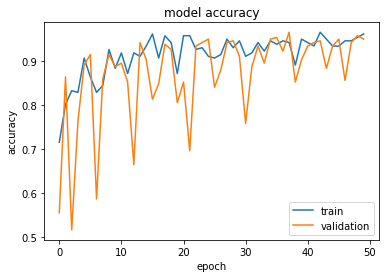

In [ ]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'validation'], loc='lower right') 
plt.show()

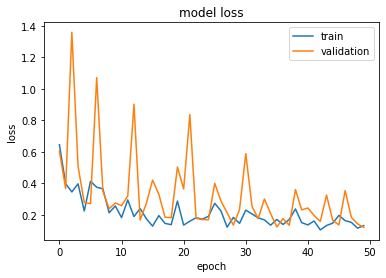

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'validation'], loc='upper right') 
plt.show()

בדיקה על test


In [ ]:
import seaborn as sns
def predict_classes(predictions):
    valResult = predictions.copy()
    valResult[valResult <= 0.5] = 0  
    valResult[valResult > 0.5] = 1   
    return valResult
def plot_confusion_matrix(predictions, labels):
    valResult = predict_classes(predictions)
    conf_matrix_df= pd.DataFrame(confusion_matrix(labels,valResult),
                                 index=["Normal", "Pneumonia"],
                                 columns=["Normal", "Pneumonia"])
    plt.figure(figsize=(7,6))
    plt.title("Confusion Matrix")
    sns.heatmap(conf_matrix_df, 
                annot=True, 
                annot_kws={"size" : "20"}, 
                fmt='.4g')
    plt.xlabel('\nPredicted', 
               fontsize=12)
    plt.ylabel('Actual', 
               fontsize=12, 
               rotation='horizontal', 
               labelpad=40)
    return cm

True Positive  (TP) =  48
False Positive (FP) =  186
False Negative (FN) =  71
True Negative  (TN) =  319
--------------------------
Precision Score: 20.51%
Recall Score: 40.34%




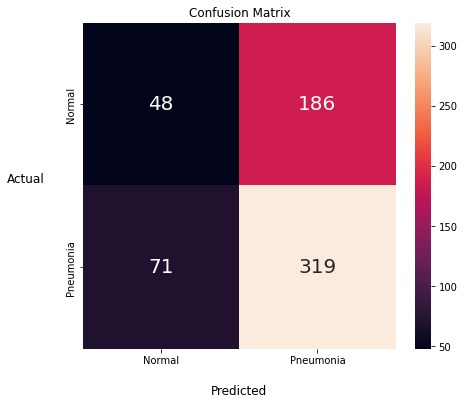

In [ ]:
prediction = model.predict(test_data)
actual_class = test_data.classes
# Confusion Matrix
valResult = predict_classes(prediction)
cm = confusion_matrix(actual_class, valResult) 
print('='*50)                                
print('True Positive  (TP) = ', cm[0][0])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[1][1])
print('-'*26)
plot_confusion_matrix(prediction, actual_class)

if (cm[0][0] + cm[0][1])!=0 and (cm[0][0], cm[1][0])!=0:
      precision= round((cm[0][0] / (cm[0][0] + cm[0][1]))*100, 2) 
      recall   = round((cm[0][0] / (cm[0][0] + cm[1][0]))*100, 2)     
      print(f'Precision Score: {precision}%')
      print(f'Recall Score: {recall}%')
      print('='*50) 
      print('\n')

הוספת שכבות קונבולוציה לשכבות הקודמות

In [ ]:
cnn = keras.Sequential(name="my_sequential_2")

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 1), name="layer1", kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(0.1))
# 2nd Convolution
cnn.add(Conv2D(64, (3, 3), activation="relu", name="layer2", kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3)))
# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))
# 3nd Convolution
cnn.add(Conv2D(128, (3, 3), activation="relu", name="layer3", kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3)))

# 3nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))
# Fully Connected Layers
cnn.add(layers.Flatten(input_shape=[64,64,1]))
cnn.add(layers.Dense(512, activation="relu", name="layer4", kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3))) 
cnn.add(Dropout(0.1))
cnn.add(layers.Dense(256, activation="relu", name="layer5", kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3)))
cnn.add(layers.Dense(32, activation="relu", name="layer6", kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3)))
cnn.add(layers.Dense(1, activation="sigmoid", name="layer7"))
cnn.summary()

Model: "my_sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 layer2 (Conv2D)             (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 layer3 (Conv2D)             (None, 12, 12, 128)   

אימון הרשת

In [ ]:
cnn.compile(optimizer = Adam(learning_rate=1e-3), loss = 'binary_crossentropy', metrics=['accuracy'])
history = cnn.fit(train_data, epochs=50,validation_data = val_data,steps_per_epoch =16,validation_steps = 16)

Epoch 1/50


KeyboardInterrupt: ignored

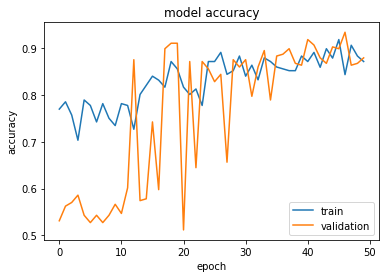

In [ ]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'validation'], loc='lower right') 
plt.show()

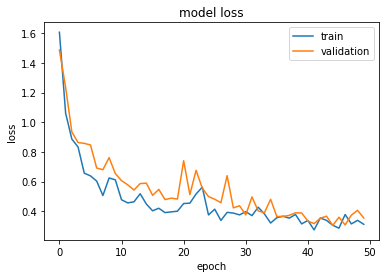

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'validation'], loc='upper right') 
plt.show()

True Positive  (TP) =  80
False Positive (FP) =  154
False Negative (FN) =  139
True Negative  (TN) =  251
--------------------------
Precision Score: 34.19%
Recall Score: 36.53%




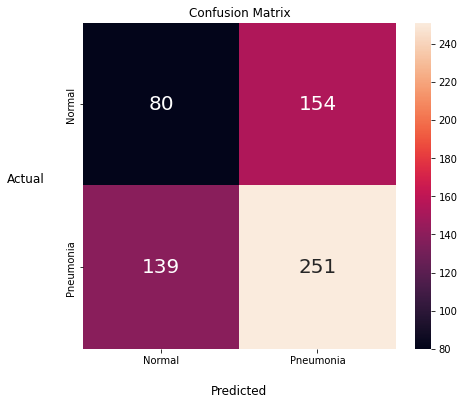

In [ ]:
prediction = cnn.predict(test_data)
actual_class = test_data.classes
# Confusion Matrix
valResult = predict_classes(prediction)
cm = confusion_matrix(actual_class, valResult) 
print('='*50)                                
print('True Positive  (TP) = ', cm[0][0])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[1][1])
print('-'*26)
plot_confusion_matrix(prediction, actual_class)

if (cm[0][0] + cm[0][1])!=0 and (cm[0][0], cm[1][0])!=0:
      precision= round((cm[0][0] / (cm[0][0] + cm[0][1]))*100, 2) 
      recall   = round((cm[0][0] / (cm[0][0] + cm[1][0]))*100, 2)     
      print(f'Precision Score: {precision}%')
      print(f'Recall Score: {recall}%')
      print('='*50) 
      print('\n')

data augmentation

In [ ]:
def process_data(img_dims, batch_size):
    # Data generation objects
    train_datagen = ImageDataGenerator(rotation_range=40,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        vertical_flip=True)
   
    # This is fed to the network in the specified batch sizes and image dimensions
    train_gen = train_datagen.flow_from_directory(
    directory='/content/chest_xray/train', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True,color_mode = 'grayscale')

    return train_gen
img_dims = 64
batch_size = 16
train_gen = process_data(img_dims, batch_size)

Found 4735 images belonging to 2 classes.


In [ ]:
cnn.compile(optimizer = Adam(learning_rate=1e-3), loss = 'binary_crossentropy', metrics=['accuracy'])
history = cnn.fit(train_gen, epochs=50,validation_data = val_data,steps_per_epoch =16,validation_steps = 16)

Epoch 1/50
16/16 [==============================] - 26s 564ms/step - loss: 1.6078 - accuracy: 0.7695 - val_loss: 1.4883 - val_accuracy: 0.5312
Epoch 2/50
16/16 [==============================] - 8s 526ms/step - loss: 1.0610 - accuracy: 0.7852 - val_loss: 1.2353 - val_accuracy: 0.5625
Epoch 3/50
16/16 [==============================] - 7s 420ms/step - loss: 0.8867 - accuracy: 0.7569 - val_loss: 0.9347 - val_accuracy: 0.5703
Epoch 4/50
16/16 [==============================] - 7s 420ms/step - loss: 0.8333 - accuracy: 0.7031 - val_loss: 0.8634 - val_accuracy: 0.5859
Epoch 5/50
16/16 [==============================] - 6s 412ms/step - loss: 0.6566 - accuracy: 0.7891 - val_loss: 0.8576 - val_accuracy: 0.5430
Epoch 6/50
16/16 [==============================] - 8s 514ms/step - loss: 0.6382 - accuracy: 0.7773 - val_loss: 0.8470 - val_accuracy: 0.5273
Epoch 7/50
16/16 [==============================] - 7s 435ms/step - loss: 0.6030 - accuracy: 0.7422 - val_loss: 0.6912 - val_accuracy: 0.5430
Epoch